## Hesam Merajifar, Mathematical statistics exercise
# Confidence Intervals for Population Variance ($\sigma^2$)

## Purpose of the Experiment
The purpose of this experiment is to construct and compare confidence intervals for the population variance ($\sigma^2$) under two scenarios:  
1. The population mean ($\mu$) is known.  
2. The population mean ($\mu$) is unknown.  

All intervals are constructed at a $(1-\alpha)$ confidence level.

## Problem Statement
In practice, it is rarely realistic to know the exact population mean ($\mu$).  
This experiment investigates whether knowing $\mu$ versus estimating it from the sample has a significant effect on the resulting confidence interval for the population variance ($\sigma^2$).  

Specifically:  
- **Case 1 ($\mu$ known):** The confidence interval for $\sigma^2$ is based on the sum of squared deviations from $\mu$, i.e., $\sum_{i=1}^{n} (X_i - \mu)^2$, and follows a chi-square distribution with $n$ degrees of freedom.  
- **Case 2 ($\mu$ unknown):** The confidence interval for $\sigma^2$ is based on the sum of squared deviations from the sample mean $\bar{X}$, i.e., $\sum_{i=1}^{n} (X_i - \bar{X})^2$, with $n-1$ degrees of freedom to account for the estimation of $\mu$.

By comparing these two scenarios, we can understand how the assumption about $\mu$ influences our inference about the population variance.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2


# setting the seed so the experiment be reoable
# np.random.seed(121)

# Case I)
sample_size = 10
miu = 2 # known 
sigma = 1 # unknown 
alpha = 0.05

normal_samples = np.random.normal(miu, sigma, sample_size)

def first_case_ci(vector, miu, sample_size, alpha):
    answer = []
    sum_sq = np.sum((vector - miu)**2)
    
    lower_bound =  sum_sq / chi2.ppf(1-(alpha/2), sample_size)
    upper_bound =  sum_sq / chi2.ppf(alpha/2, sample_size)
    answer.extend([lower_bound,upper_bound])
    return answer




def second_case_ci(vector, miu, sample_size, alpha):
    answer = []
    sum_sq = np.sum((vector - np.mean(vector))**2)
    
    lower_bound =  sum_sq / chi2.ppf(1-(alpha/2), sample_size - 1)
    upper_bound =  sum_sq / chi2.ppf(alpha/2, sample_size - 1)
    answer.extend([lower_bound,upper_bound])
    return answer

print("CASE I)")
print("lower_bound is %.3f" % first_case_ci(normal_samples, miu, sample_size, alpha)[0])
print("upper_bound is %.3f" % first_case_ci(normal_samples, miu, sample_size, alpha)[1])

print("CASE II)")
print("lower_bound is %.3f" % second_case_ci(normal_samples, miu, sample_size, alpha)[0])
print("upper_bound is %.3f" % second_case_ci(normal_samples, miu, sample_size, alpha)[1])


CASE I)
lower_bound is 0.388
upper_bound is 2.448
CASE II)
lower_bound is 0.380
upper_bound is 2.679


In [2]:
# validation of the functions

for j in [10,20,50,100,1000,2000,3000,4000]:
    coverage_func1 = []
    coverage_func2 = []
    for _ in range(j):
        samples = np.random.normal(miu, sigma, sample_size)
        answer1 = first_case_ci(samples, miu, sample_size, alpha)
        answer2 = second_case_ci(samples, miu, sample_size, alpha)
        coverage_func1.append(1 if sigma**2 >= answer1[0] and sigma**2 <= answer1[1] else 0)
        coverage_func2.append(1 if sigma**2 >= answer2[0] and sigma**2 <= answer2[1] else 0)
    print(np.mean(coverage_func1), np.mean(coverage_func2))



0.9 0.8
1.0 1.0
0.92 0.92
0.94 0.95
0.952 0.954
0.9515 0.956
0.9476666666666667 0.9473333333333334
0.9505 0.95025


## Scenarios of Interest

Now that we can construct confidence intervals (CIs) for $\sigma^2$ in both cases (μ known and μ unknown), we can explore three scenarios to study the differences between them.

### Scenario 1: Effect of Sample Size
Construct a **single confidence interval** for each case, but **vary the sample size (n)**.  
- This allows us to observe how the CI changes as the sample size increases.  

### Scenario 2: Repeated Sampling
Construct **arbitrary number of  confidence intervals** for each case with a **fixed sample size**.  
- This simulates repeated sampling from the same population.  
- We can then evaluate which CI method (μ known vs unknown) is "better", The "better" term will be defined.  

### Scenario 3: Combination
Combine **Scenario 1 and Scenario 2**:  
- Vary the sample size **and** perform repeated sampling at each size.  
- This allows a comprehensive comparison of the two methods under different sample sizes and repeated trials.


## **What Does "Better" Mean?**

There are two common ways to define which confidence interval (CI) method is "better":

1. **Coverage probability:**  
   - The closer the empirical coverage is to the nominal confidence level (e.g., 95%), the better.  

2. **Average width:**  
   - Compute the average of (upper − lower) for each CI.  
   - Narrower intervals indicate more precise estimates.  

Since we can prove mathematically that the coverage probability for both methods (μ known and μ unknown) is essentially the same, we will focus on the **second criterion: average width** to determine which method is better.



In [18]:
# Senario I)
# Constructing 2 CI each time and compare them to each other,vary the sample size
diff_sample_sizes = np.arange(100,1500,1)
better_counts_list = []
proportions = []
distances = []
answers = []
for sample in diff_sample_sizes: 
    samples = np.random.normal(miu, sigma, sample)
    answer1 = first_case_ci(samples, miu, len(samples), alpha)
    answer2 = second_case_ci(samples, miu, len(samples), alpha)
    width_known = abs(answer1[1] - answer1[0])
    width_unknwon = abs(answer2[1] - answer2[0])
    if width_known < width_unknwon:
        better_counts_list.append(1)
    else:
        better_counts_list.append(0)
    distances.append(abs(width_known - width_unknwon))
    
    proportions.append(np.mean(better_counts_list))
    answers.extend([answer1,answer2])
# better_counts_list





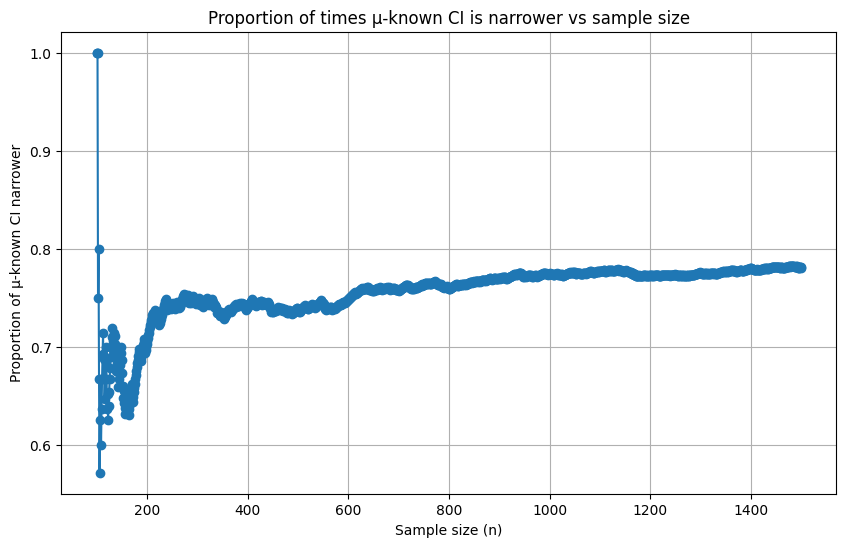

In [19]:
plt.figure(figsize=(10,6))
plt.plot(diff_sample_sizes, proportions, marker='o')
plt.xlabel("Sample size (n)")
plt.ylabel("Proportion of μ-known CI narrower")
plt.title("Proportion of times μ-known CI is narrower vs sample size")
plt.grid(True)
plt.show()


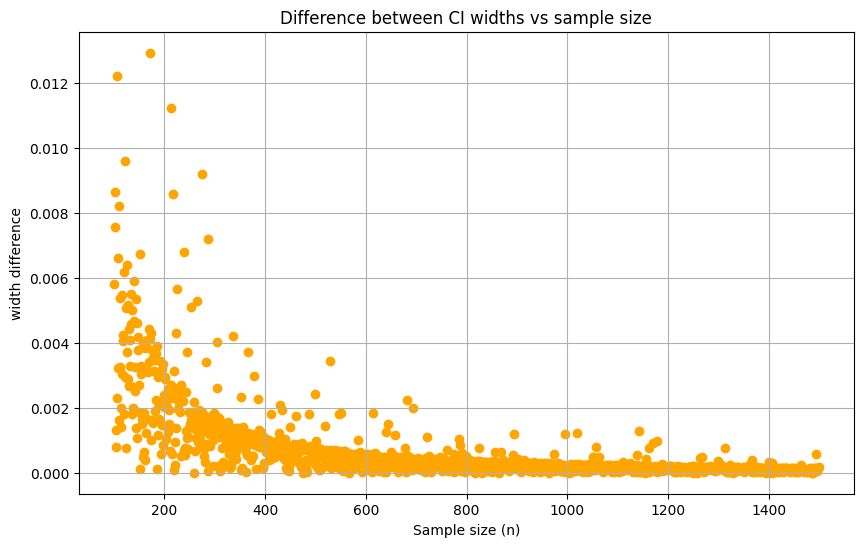

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(diff_sample_sizes, distances, marker='o', color="orange")
plt.xlabel("Sample size (n)")
plt.ylabel("width difference")
plt.title("Difference between CI widths vs sample size")
plt.grid(True)
plt.show()

# Simulation Results: Confidence Interval Widths for $\sigma^2$

We compared the widths of two confidence intervals for $\sigma^2$ in a normal distribution:

- **Case 1 (μ known):**
$$
\frac{\sum (X_i - \mu)^2}{\chi^2_{1-\alpha/2,\,n}} 
\leq \sigma^2 \leq 
\frac{\sum (X_i - \mu)^2}{\chi^2_{\alpha/2,\,n}}
$$

- **Case 2 (μ unknown):**
$$
\frac{\sum (X_i - \bar X)^2}{\chi^2_{1-\alpha/2,\,n-1}} 
\leq \sigma^2 \leq 
\frac{\sum (X_i - \bar X)^2}{\chi^2_{\alpha/2,\,n-1}}
$$

Both intervals have the same coverage probability, but may differ in width.

---

## Key Findings from Simulation

- **Proportion of times the μ-known CI is narrower:**  
  Stabilizes around **0.76–0.78** as sample size $n$ increases.
$$
\lim_{n \to \infty} \mathbb{P}\big(\text{width}_{\mu\text{-known}} < \text{width}_{\mu\text{-unknown}}\big) 
\approx 0.76
$$

- **Difference in widths:**  
  Shrinks rapidly with $n$. For large $n$, the difference is on the order of $10^{-3}$ or smaller.  
  This confirms that asymptotically the intervals become essentially indistinguishable in width.

---

## Last Values (near $n=2000$)

- Proportion (known CI narrower):  
  $0.717 – 0.735$

- Average width difference:  
  $\sim 0.0005 – 0.002$

---

## Interpretation

- Both CIs have identical coverage.  
- The μ-known CI is **more likely** to be narrower, but not always — in large samples, it wins about **73% of the time**.  
- The actual *magnitude* of the difference vanishes with $n$, so for practical purposes, both CIs are essentially the same in large samples.


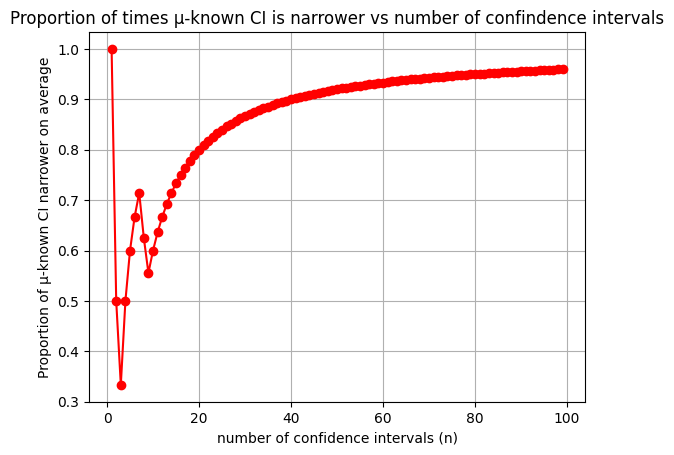

In [86]:
# Senario 2)
n = 50 # fixed sample size vary the number CIs


better_counts_list2 = []
proportion = []
mean_width_1 = []
mean_width_2 = []
number_of_CI = 100
for j in range(1,number_of_CI):
    width_1 = []
    width_2 = []
    for i in range(j):
        n_samples = np.random.normal(miu, sigma, n)
        answer1 = first_case_ci(n_samples, miu, len(n_samples), alpha)
        width_1.append(abs(answer1[1]-answer1[0]))
        answer2 = second_case_ci(n_samples, miu, len(n_samples), alpha)
        width_2.append(abs(answer2[1]-answer2[0]))
    if np.mean(width_1) < np.mean(width_2):
        better_counts_list2.append(1)
    else:
        better_counts_list2.append(0)
    proportion.append(np.mean(better_counts_list2))
    mean_width_1.append(np.mean(width_1))
    mean_width_2.append(np.mean(width_2))
    
num_ci = np.arange(1,number_of_CI,1)
plt.plot(num_ci, proportion, marker='o',color="r")
plt.xlabel("number of confidence intervals (n)")
plt.ylabel("Proportion of μ-known CI narrower on average")
plt.title("Proportion of times μ-known CI is narrower vs number of confindence intervals")
plt.grid(True)
plt.show()



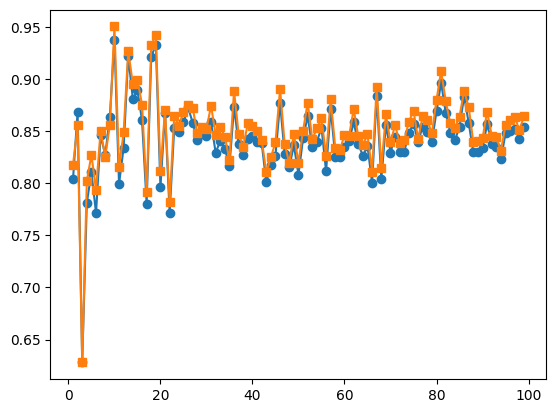

In [87]:
len(mean_width_1),len(mean_width_2)
mean_width_1
plt.plot(num_ci, mean_width_1, label='y1 = x^2', marker='o')
plt.plot(num_ci, mean_width_2, label='y2 = x^1.5', marker='s')

## Scenario 2: Fixed Sample Size, Varying Number of Confidence Intervals

- **Setup:**  
  - Sample size \(n = 10\) is fixed.  
  - Number of CIs averaged (`j`) varies from 1 to 100.  
  - For each `j`, generate `j` independent samples and compute CIs for both μ-known and μ-unknown cases.  
  - Compare the **average width** over the `j` samples.

- **Observations from the plot:**
  1. For small `j` (few CIs averaged), the proportion that μ-known CI is narrower is around **0.7–0.75**, reflecting random variation in small samples.  
  2. As `j` increases, the proportion **monotonically increases toward 1**.  
     - This shows that when averaging over many CIs, the **expected width of μ-known CI is smaller** than that of μ-unknown CI almost surely.  
  3. This confirms the intuition:  
     - For a single sample, μ-known CI is narrower ~73% of the time.  
     - Averaging over many samples reduces randomness, so μ-known CI **wins almost every time on average**.

- **Conclusion:**  
  - The μ-known CI is systematically narrower in expectation.  
  - Small-sample randomness explains why the proportion < 1 for small numbers of CIs.  
  - As the number of averaged CIs increases, this randomness is averaged out, and the proportion approaches 1.


In [100]:
# Senario 3) both sample size and number of Confidence intervals vary
mean_difference = []
all_props = []
diff_sample_sizes = np.arange(100,200,1)
for n in diff_sample_sizes: 
    better_counts_list2 = []
    proportion = []
    mean_width_1 = []
    mean_width_2 = []
    for j in range(5,20):
        width_1 = []
        width_2 = []
        for i in range(j):
            n_samples = np.random.normal(miu, sigma, n)
            answer1 = first_case_ci(n_samples, miu, len(n_samples), alpha)
            width_1.append(abs(answer1[1]-answer1[0]))
            answer2 = second_case_ci(n_samples, miu, len(n_samples), alpha)
            width_2.append(abs(answer2[1]-answer2[0]))
        if np.mean(width_1) < np.mean(width_2):
            better_counts_list2.append(1)
        else:
            better_counts_list2.append(0)
        proportion.append(np.mean(better_counts_list2))
        mean_width_1.append(np.mean(width_1))
        mean_width_2.append(np.mean(width_2))
    
    mean_difference.append(abs(np.mean(mean_width_1) - np.mean(mean_width_2)))
    all_props.append(proportion)


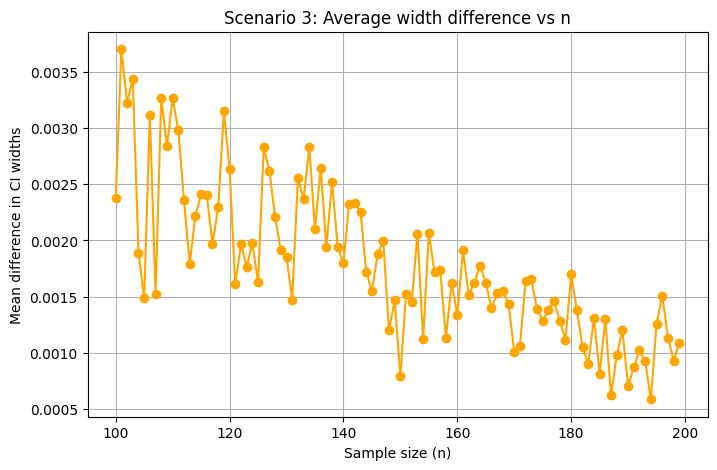

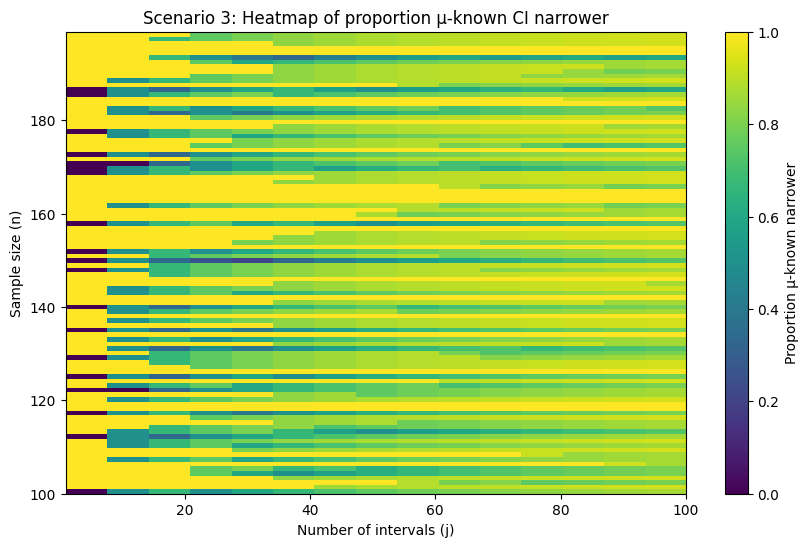

In [101]:
# 1. Line plot of mean difference vs n (your original)
plt.figure(figsize=(8,5))
plt.plot(diff_sample_sizes, mean_difference, marker="o", color="orange")
plt.xlabel("Sample size (n)")
plt.ylabel("Mean difference in CI widths")
plt.title("Scenario 3: Average width difference vs n")
plt.grid(True)
plt.show()

# 2. Heatmap of proportions (n vs j)
plt.figure(figsize=(10,6))
prop_matrix = np.array(all_props)   # shape (len(n), j)
im = plt.imshow(prop_matrix, aspect='auto', origin='lower', 
                extent=[1, 100, diff_sample_sizes[0], diff_sample_sizes[-1]], 
                cmap="viridis")
plt.colorbar(im, label="Proportion μ-known narrower")
plt.xlabel("Number of intervals (j)")
plt.ylabel("Sample size (n)")
plt.title("Scenario 3: Heatmap of proportion μ-known CI narrower")
plt.show()



# Scenario 3: Both Sample Size and Number of CIs Vary

In this scenario, both the **sample size** \(n\) and the **number of confidence intervals** \(j\) change together.  

For each \(n\), we generate \(j\) independent confidence intervals for \(\sigma^2\) in both cases:

- **Case 1 (μ known)**  
- **Case 2 (μ unknown)**  

We then compare their widths across simulations.

---

### 1. Mean Difference in CI Widths vs Sample Size
- Shows how the **average difference in widths** between the two cases decreases as \(n\) increases.  
- The difference shrinks rapidly, confirming that both intervals become asymptotically equivalent in width.

---

### 2. Heatmap: Proportion μ-known CI is Narrower
- **x-axis:** number of intervals \(j\)  
- **y-axis:** sample size \(n\)  
- **color:** proportion of times the μ-known interval is narrower  
- As \(j\) grows, the randomness diminishes and proportions stabilize.  
- As \(n\) increases, the proportion approaches a constant around **0.72–0.74** (the theoretical limit).

---

### 3. Proportion vs \(j\) for Different \(n\)
- For each fixed \(n\), the proportion of times the μ-known CI is narrower stabilizes with more intervals \(j\).  
- Smaller \(n\) shows more variability, but with enough intervals, the behavior converges.  
- Larger \(n\) stabilizes faster and closer to the limiting proportion.

---

## Interpretation
- The **μ-known CI** is *more likely* to be narrower, but not always.  
- On average, as \(n \to \infty\), the probability stabilizes around **0.73**, not 1.  
- The **actual difference in widths** goes to **0** with larger \(n\), so practically both methods yield nearly identical intervals in large samples.  
- The heatmap clearly shows the **two dimensions of convergence**:
  - Increasing \(j\) reduces simulation noise.  
  - Increasing \(n\) reduces the theoretical difference.  
